## Data Dining Delight

A Recipe Recommender System

![Recipes](https://www.pngitem.com/pimgs/m/87-877725_recipes-png-transparent-png.png)

#### Project Overview

Exploring the dynamics of user behavior patterns, and recipe interactions, this project delves into the 'Recipe Reviews and User Feedback Dataset' to derive insights, develop a personalized recipe recommendation system, and enhance the culinary experience on online platforms.

## BACKGROUND

The "Recipe Reviews and User Feedback Dataset" is a comprehensive repository of data encompassing various aspects of recipe reviews and user interactions. It includes essential information such as the recipe name, its ranking on the top 100 recipes list, a unique recipe code, and user details like user ID, user name, and an internal user reputation score. Each review comment is uniquely identified with a comment ID and comes with additional attributes, including the creation timestamp, reply count, and the number of up-votes and down-votes received. Users' sentiment towards recipes is quantified on a 1 to 5 star rating scale, with a score of 0 denoting an absence of rating.  It offers a window into the dynamics of recipe reviews and user feedback within the culinary website domain.
https://archive.ics.uci.edu/dataset/911/recipe+reviews+and+user+feedback+dataset

The ingredient dataset complements Recipe Reviews and User Feedback Dataset and it has 3 columns that is recipe name,ingredients and cooking instructions.This dataset was sourced from GPT AI.

## Business Problem

Bay Bistro Food Company aims to elevate user engagement and satisfaction on its recipe platform by implementing a personalized recipe recommendation system. Despite boasting an extensive repertoire of recipes, users frequently encounter difficulties in discovering new dishes that align with their preferences. Recognizing the potential to expand its services, the company intends to introduce ingredient boxes to its offerings. The Miles group has been commissioned to tackle this issue by devising a recommendation system capable of analyzing user interactions and feedback to deliver tailored recipe suggestions, thereby enhancing the overall user experience and fostering customer loyalty.

### Objectives

**User Behavior Analysis**:
Understand user preferences and behavior by analyzing recipe reviews, ratings, and interactions.
Identify popular recipes and trending ingredients based on user feedback.

**Personalized Recipe Recommendations:**
Develop a recommendation algorithm to suggest recipes tailored to each user's taste and preferences.
Utilize collaborative filtering and content-based filtering techniques to enhance personalized recommendations.

**User Interface and Experience Design:**
Develop an intuitive and user-friendly interface for users to easily browse recipes, read reviews, and receive recommendations.


## Data Understanding
We had two data sets recipe dataset and ingredients dataset.

The recipe review and user feedback data set contains the following columns:
1. recipe name: {name of the recipe the comment was posted on}
2. recipe number: {placement of the recipe on the top 100 recipes list}
3. recipe code: {unique id of the recipe used by the site}
4. comment id: {unique id of the comment}
5. user id: {unique id of the user who left the comment}
6. user name: {name of the user}
7. user reputation: {internal score of the site, roughly quantifying the past behavior of the user}
8. create at: {time at which the comment was posted as a Unix timestamp}
9. reply count: {number of replies to the comment}
10. thumbs up: {number of up-votes the comment has received}
11. thumbs down: {number of down-votes the comment has received}
12. stars: {the score on a 1 to 5 scale that the user gave to the recipe. A score of 0 means that no score was given}
13. best score: {score of the comment, likely used by the site the help determine the order in the comments that appear in}

14. text: {the text content of the comment}



The ingredients data set contains the following columns:

1. recipe name: {name of the recipe the comment was posted on}
2. Ingredients:lists of ingredients required for the corresponding recipe.
3. Cooking Instructions: This column provides the step-by-step instructions for preparing each recipe. 

In [1]:
#importing neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import train_test_split
from surprise import KNNWithMeans
from surprise import KNNWithMeans
from surprise.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from surprise import SVD
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
np.random.seed(42)
from keras.layers import Input, Embedding, Flatten,Concatenate, Dense
from keras.models import Model
import tensorflow as tf
tf.random.set_seed(42)
from surprise import accuracy
import warnings

In [2]:
#loading the recipe review and user feedback data set
df1=pd.read_csv('Recipe.csv',index_col=0)
df1.head()

,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0.0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0.0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0.0,3,0,5,710,I have a very complicated white chicken chili ...
3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2.0,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1.0,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [3]:
#loading the ingredients data set
df2=pd.read_csv('ingredients.csv')
df2.head()

,recipe_name,ingredients,cooking_instructions
0,Creamy White Chili,"1 lb chicken breast, diced\r\n1 onion, chopped...","In a large pot, cook diced chicken breast unti..."
1,Best Ever Banana Bread,"2-3 ripe bananas, mashed\r\n1/3 cup melted but...",1. Preheat oven to 350°F (175°C). Grease a 9x5...
2,Cheeseburger Soup,"1 lb ground beef\r\n1 onion, chopped\r\n2 clov...","1. In a large pot, brown ground beef over medi..."
3,Amish Breakfast Casserole,"6 slices bread, cubed\r\n1 lb bulk pork sausag...",1. Preheat oven to 350°F (175°C). Grease a 9x1...
4,Pumpkin Spice Cupcakes with Cream Cheese Frosting,For the cupcakes:\r\n1 1/2 cups all-purpose fl...,For the cupcakes:\r\n1. Preheat oven to 350°F ...


In [4]:
#checking ingredients data shape
df2.shape

(100, 3)

- The data set has 100 observations and 3 columns 

In [5]:
#checking recipe review and user feedback data shape
df1.shape

(18182, 14)

- The data set has 18182 observations and 14 columns

In [6]:
#checking data information
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18182 entries, 0 to 118
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recipe_number    18182 non-null  int64  
 1   recipe_code      18182 non-null  int64  
 2   recipe_name      18182 non-null  object 
 3   comment_id       18182 non-null  object 
 4   user_id          18182 non-null  object 
 5   user_name        18182 non-null  object 
 6   user_reputation  18182 non-null  int64  
 7   created_at       18182 non-null  int64  
 8   reply_count      18160 non-null  float64
 9   thumbs_up        18182 non-null  int64  
 10  thumbs_down      18182 non-null  int64  
 11  stars            18182 non-null  int64  
 12  best_score       18182 non-null  int64  
 13  text             18180 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 2.1+ MB


`Observation`

- Missing Data:reply_count has 22 missing values and text has 2 missing values

- Data Types:8 columns are integers (int64),1 column is float (float64) and 5 columns are strings/text (object)


In [7]:
#checking data information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   recipe_name           100 non-null    object
 1   ingredients           99 non-null     object
 2   cooking_instructions  100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


`Observation`
- The data set has type object one row has missing ingredients

## DATA PREPROCESSING

Data Cleaning

To ensure the development of a robust and accurate model, several data cleaning techniques will be applied to the dataset. The following techniques will be employed:

- Completeness: This technique involves addressing missing values within the dataset. Steps will be taken to identify and handle missing data appropriately, either through imputation or removal, to ensure that the dataset is complete.

- Consistency: The consistency of the data will be examined to identify any discrepancies or irregularities. Inconsistencies in variables, such as conflicting formats or conflicting information within the dataset, will be addressed and resolved to maintain data integrity.

- Validity: Validity refers to the accuracy and relevance of the data. Data validation techniques will be applied to verify that the values within each variable align with expected ranges or predefined criteria. Any invalid or erroneous data points will be rectified or removed from the dataset.

- Uniformity: Uniformity is crucial during the data cleaning process to ensure consistency and accurate analysis. Inconsistent or non-uniform data can introduce errors and bias into the modeling process, leading to unreliable results. Robust techniques will be employed to detect and handle non-uniformity effectively, ensuring that the data is standardized and aligned.

By applying these data cleaning techniques, the dataset will be refined and prepared, ensuring the reliability and accuracy of the data before proceeding with the subsequent stages of analysis and modeling.

### Completeness
To achieve completeness in our data, I will be checking for missing values in the data.

In [8]:
# Checking for null values in df1
missing_values = df1.isna().sum().sum()
print(f'The data has {missing_values} missing values')

The data has 24 missing values


In [9]:
# Checking for null values in df2
missing_values=df2.isna().sum().sum()
print(f'The data has {missing_values} missing values')

The data has 1 missing values


In [10]:
# Define a function to explore missing data for recipe data set
def missing_data(df1):
    missing_data = df1.isna().sum()
    missing_data = missing_data[missing_data>0]
    return missing_data.to_frame()

In [11]:
# Define a function to explore missing data for ingridients data sert
def missing_data(df2):
    missing_data = df2.isna().sum()
    missing_data = missing_data[missing_data>0]
    return missing_data.to_frame()

In [12]:
# expanding the number of visible columns
pd.set_option('display.max_columns', None)

In [13]:
# Apply missing_data function to the dataframe
missing_data(df1).T

,reply_count,text
0,22,2


`Observation`
- The results shows reply_count has 22 missing values while text has 2 missing values

In [14]:
# Apply missing_data function to the dataframe
missing_data(df2).T

,ingredients
0,1


`Observation`
- The output shows ingredients have 1 missing value

In [15]:
#Fill missing values in 'reply_count' column with 0
df1['reply_count'] = df1['reply_count'].fillna(0)

In [16]:
# Droping rows where the "text" column is missing
df1 = df1.dropna(subset=['text'])

In [17]:
# Droping rows where the "ingredients" column is missing
df2 = df2.dropna(subset=['ingredients'])

In [18]:
# converting 'created_at' to datetime
df1['created_at'] = pd.to_datetime(df1['created_at'], unit='s')

In [19]:
# checking to see if missing values have been replaced for recipe data
print(f'The data has {df1.isna().sum().sum()} missing values')

The data has 0 missing values


In [20]:
# checking to see if missing values have been replaced for ingridients data
print(f'The data has {df2.isna().sum().sum()} missing values')

The data has 0 missing values


### Consistency
For the data to be constistent, I need to resolve any inconsistencies by checking for duplicate values in our data.

In [21]:
# checking for duplicates for recipe data set
print(f'The data has {df1.duplicated().sum()} duplicates')

The data has 0 duplicates


In [22]:
# checking for duplicates for ingridients data
print(f'The data has {df2.duplicated().sum()} duplicates')

The data has 0 duplicates


- The data has no duplicate values

### Validity

For our data to be valid, I have to verify that every column is accurate and appropriate for this analysis and remove those that are invalid.

In [23]:
#validity checks
df1.head(2)

,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,2022-10-13 00:11:29,0.0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,2022-10-09 01:08:07,0.0,7,0,5,724,Bush used to have a white chili bean and it ma...


In [24]:
#validity checks
df2.head(2)

,recipe_name,ingredients,cooking_instructions
0,Creamy White Chili,"1 lb chicken breast, diced\r\n1 onion, chopped...","In a large pot, cook diced chicken breast unti..."
1,Best Ever Banana Bread,"2-3 ripe bananas, mashed\r\n1/3 cup melted but...",1. Preheat oven to 350°F (175°C). Grease a 9x5...


### Uniformity
- For our data to be uniform, I have to verify that every column is correct and convert them to there appropriate data type.

In [25]:
#checking for data types
df1.dtypes

recipe_number               int64
recipe_code                 int64
recipe_name                object
comment_id                 object
user_id                    object
user_name                  object
user_reputation             int64
created_at         datetime64[ns]
reply_count               float64
thumbs_up                   int64
thumbs_down                 int64
stars                       int64
best_score                  int64
text                       object
dtype: object

In [26]:
#Converting data types 'reply_count' to integer
df1['reply_count'] = df1['reply_count'].astype(int)

In [27]:
# Convert user_id to integer values
df1['user_id'] = df1['user_id'].rank(method='dense').astype(int)

## Feature engineering

In [28]:
#Merging  the data df1 and df2
df=pd.merge(df1,df2, on='recipe_name',how='left')


In [29]:
# Saving the merged DataFrame as a CSV file
df.to_csv('merged_data.csv', index=False)

In [30]:
# Rename the "stars" column to "ratings"
df.rename(columns={'stars': 'ratings'}, inplace=True)

In [31]:
# Define a function to convert a list of strings
def convert_list_strings(lst):
    return [word.replace("'", "").replace(" ", "").replace("-", "") for word in lst]

# Define a function to apply conversion to a list
def convert_a_word(val):
    if isinstance(val, list):
        return convert_list_strings(val)
    else:
        return val

# Transforming columns
columns_to_transform = ['text', 'ingredients', 'cooking_instructions']
for column in columns_to_transform:
    df[column] = df[column].apply(convert_a_word)

In [32]:
# Extract column and create a new 'month' column
#df['month'] = df['created_at'].dt.month
df['month'] = df['created_at'].dt.strftime('%B')


In [33]:
# Droping the columns 
df.drop(columns=['created_at','text','user_name','comment_id'], inplace=True)

In [34]:
#Drop rows with missing values in the 'ingredients' and cooking_instructions column
df = df.dropna(subset=['ingredients'])
df = df.dropna(subset=['cooking_instructions'])

In [35]:
df.head()

,recipe_number,recipe_code,recipe_name,user_id,user_reputation,reply_count,thumbs_up,thumbs_down,ratings,best_score,ingredients,cooking_instructions,month
0,1,14299,Creamy White Chili,13114,1,0,0,0,5,527,"1 lb chicken breast, diced\r\n1 onion, chopped...","In a large pot, cook diced chicken breast unti...",October
1,1,14299,Creamy White Chili,13276,50,0,7,0,5,724,"1 lb chicken breast, diced\r\n1 onion, chopped...","In a large pot, cook diced chicken breast unti...",October
2,1,14299,Creamy White Chili,13695,10,0,3,0,5,710,"1 lb chicken breast, diced\r\n1 onion, chopped...","In a large pot, cook diced chicken breast unti...",September
3,1,14299,Creamy White Chili,13533,1,2,2,0,0,581,"1 lb chicken breast, diced\r\n1 onion, chopped...","In a large pot, cook diced chicken breast unti...",August
4,1,14299,Creamy White Chili,13433,10,1,7,0,0,820,"1 lb chicken breast, diced\r\n1 onion, chopped...","In a large pot, cook diced chicken breast unti...",October


### EXPLORATORY DATA ANALYSIS

#### Visualization of rating distribution

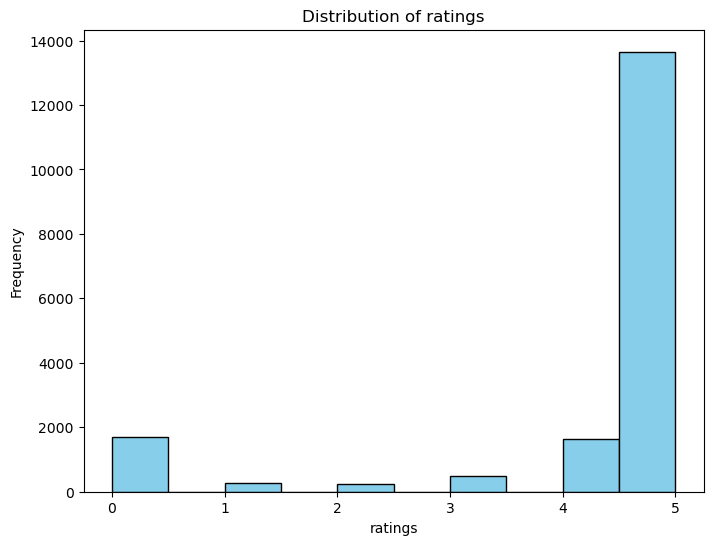

In [36]:
# Plotting with seaborn and matplotlib
plt.figure(figsize=(8, 6))
plt.hist(df['ratings'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of ratings')
plt.xlabel('ratings')
plt.ylabel('Frequency')
plt.show()

`Observation`

There seems to be a concentration of bars on the right side of the graph, suggesting a higher frequency of recipes receiving positive ratings.However, there's also a range of ratings, indicating some variation in user preferences.

#### Visualizing rating trends over months

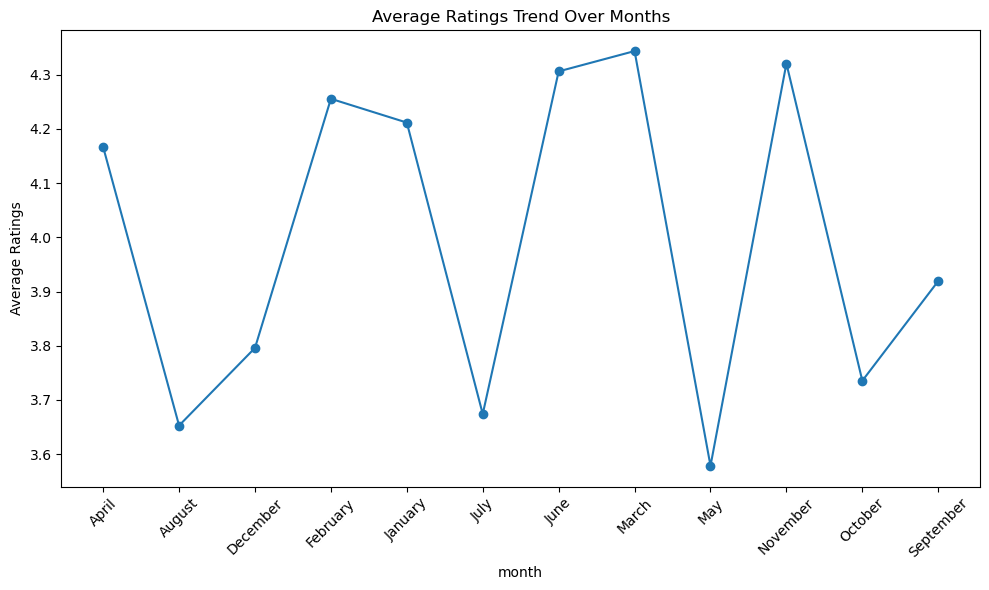

In [37]:
# Grouping by month to calculate average ratings
ratings_trend = df.groupby('month')['ratings'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ratings_trend['month'], ratings_trend['ratings'], marker='o')
plt.title('Average Ratings Trend Over Months')
plt.xlabel('month')
plt.ylabel('Average Ratings')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()


`Observation`

- The line shows some fluctuations in the average rating over time.There's a possibility of a slight downward trend in the average rating as the months progress
- March received the highest customer feedback, with November and June following closely, while May, July, and August had the least response.

### Top 5 recipes

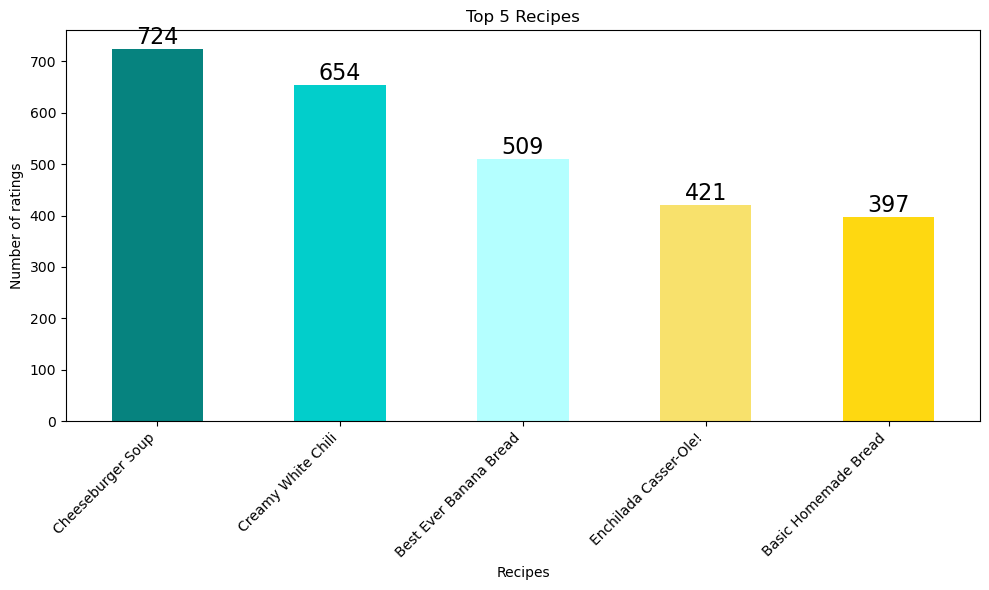

In [38]:
# Group by recipe and count the number of stars, then sort in descending order
top_10_recipes = df.groupby('recipe_name')['ratings'].count().sort_values(ascending=False).head()

# list of custom colors for the bars
custom_colors = ['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811']

# bar plot with custom colors
plt.figure(figsize=(10, 6))
ax = top_10_recipes.plot(kind='bar', color=custom_colors)

ax.grid(False)

plt.title('Top 5 Recipes')
plt.xlabel('Recipes')
plt.ylabel('Number of ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add the number of ratings on top of each bar
for i, v in enumerate(top_10_recipes):
 ax.text(i, v, str(v), ha='center', va='bottom', fontsize=16, color='black')
plt.show()

### Visualization Top 10 recipe

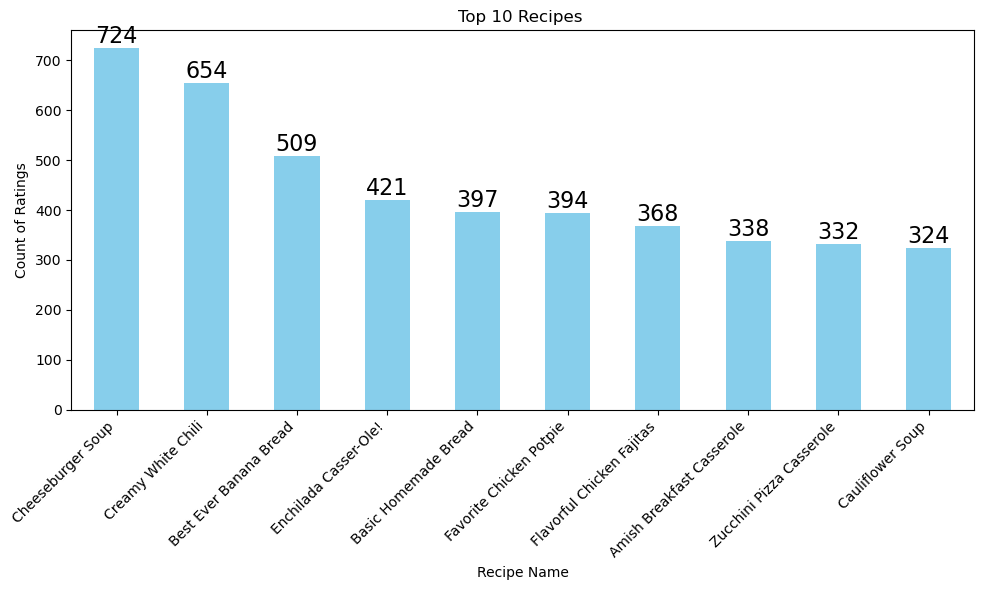

In [39]:
# Group by recipe_name and count the number of ratings
top_10_recipes = df['recipe_name'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
ax=top_10_recipes.plot(kind='bar', color='skyblue')

# Remove grid lines
ax.grid(False)

plt.title('Top 10 Recipes ')
plt.xlabel('Recipe Name')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adding the number of ratings on top of each bar
for i, v in enumerate(top_10_recipes):
 ax.text(i, v, str(v), ha='center', va='bottom', fontsize=16, color='black')
plt.show()

 `Observation`

 The graph suggests that Cheeseburger Soup,Creamy White Chili,Best Ever Banana Bread,Enchilada Casserole-Ole!,Basic Homemade Bread,Favorite Chicken Potpie,Flavorful Chicken Fajitas,Amish Breakfast Casserole,Zucchini Pizza Casserole,Cauliflower Soupthese  are the most popular recipes among users based on the number of ratings they have received

#### Multivariate Analysis

Our aim here is to look for the relationship between different features

First we look at the correlation of the numeric columns using Pearson's coefficient

In [40]:
# Pearson coefficient of numeric columns
numerical_columns_df = df[[
    'user_reputation',
    'reply_count',
    'thumbs_up',
    'thumbs_down',
    'ratings',
    'best_score'

]]
numerical_columns_df.corr()

,user_reputation,reply_count,thumbs_up,thumbs_down,ratings,best_score
user_reputation,1.000000,0.010741,0.057284,0.023680,0.015683,0.136188
reply_count,0.010741,1.000000,0.210079,0.331602,-0.120224,0.203129
thumbs_up,0.057284,0.210079,1.000000,0.372920,-0.049711,0.683421
thumbs_down,0.023680,0.331602,0.372920,1.000000,-0.141187,0.212812
ratings,0.015683,-0.120224,-0.049711,-0.141187,1.000000,-0.031766
best_score,0.136188,0.203129,0.683421,0.212812,-0.031766,1.000000


`Observations`

 The correlation matrix provides valuable insights into the relationships between different features.
 For instance, thumbs up and best score have a strong positive correlation, suggesting that users who give more thumbs up tend to have higher best scores. On the other hand, reply count and ratings have a weak negative relationship, implying that users who reply more may give slightly lower ratings.

### MODELLING

## Item-Based Collaborative Filtering

its recommendation technique that focuses on the similarity between items rather than between users.

In [41]:
#preparing the data by converting the provided DataFrame to a surprise dataset
ratings_df = pd.DataFrame(df)

# Define the reader object
reader = Reader(rating_scale=(0, 100))

# Load data from DataFrame
data = Dataset.load_from_df(ratings_df[['user_id', 'recipe_code', 'ratings']], reader)


In [42]:

# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.25)

# Define similarity options for item-based CF
sim_options = {
    'name': 'pearson_baseline',
    'user_based': False  # Item-based
}

# initializing and train model 
algo_item_based = KNNWithMeans(k=5, sim_options=sim_options)
algo_item_based.fit(trainset)

# Predict ratings for the test set
predictions_item_based = algo_item_based.test(testset)

# evaluating RMSE (Root Mean Square Error)
print("Item-Based CF RMSE:", accuracy.rmse(predictions_item_based))
print("Item-Based CF MAE:", accuracy.mae(predictions_item_based))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.5095
Item-Based CF RMSE: 1.5094580354977554
MAE:  0.9909
Item-Based CF MAE: 0.9908501246430499


`Observation`

The reported RMSE of 1.5476 and MAE of 1.0135 suggest that the item-based collaborative filtering model using Pearson-baseline similarity performs reasonably well.

### Content-Based Filtering with Cosine Similarity
Content-based filtering with cosine similarity is a technique used in recommendation systems to suggest items

In [43]:
# Creating TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the ingredients data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['ingredients'])

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

#  mapping of recipe names to their corresponding indices
indices = pd.Series(df.index, index=df['recipe_name']).drop_duplicates()

# Function to get recommendations based on cosine similarity
def get_recommendations(recipe_name, cosine_sim=cosine_sim):
    idx = indices[recipe_name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1][0], reverse=True)

    sim_scores = sim_scores[1:11]  # Get top 10 similar recipes
    recipe_indices = [i[0] for i in sim_scores]
    similar_recipes = df.iloc[recipe_indices]
    similar_recipe_names = similar_recipes['recipe_name'].tolist()
    similar_recipe_ingredients = similar_recipes['ingredients'].tolist()
    return list(zip(similar_recipe_names, similar_recipe_ingredients))

# Example usage
get_recommendations('Creamy White Chili')

[('Creamy White Chili',
  '1 lb chicken breast, diced\r\n1 onion, chopped\r\n2 cloves garlic, minced\r\n2 cans (15 oz each) white beans, drained and rinsed\r\n1 can (4 oz) chopped green chilies\r\n2 cups chicken broth\r\n1 cup heavy cream\r\n1 tsp cumin\r\n1 tsp oregano\r\nSalt and pepper to taste\r\nOptional toppings: shredded cheese, sour cream, chopped cilantro, sliced jalapenos'),
 ('Creamy White Chili',
  '1 lb chicken breast, diced\r\n1 onion, chopped\r\n2 cloves garlic, minced\r\n2 cans (15 oz each) white beans, drained and rinsed\r\n1 can (4 oz) chopped green chilies\r\n2 cups chicken broth\r\n1 cup heavy cream\r\n1 tsp cumin\r\n1 tsp oregano\r\nSalt and pepper to taste\r\nOptional toppings: shredded cheese, sour cream, chopped cilantro, sliced jalapenos'),
 ('Creamy White Chili',
  '1 lb chicken breast, diced\r\n1 onion, chopped\r\n2 cloves garlic, minced\r\n2 cans (15 oz each) white beans, drained and rinsed\r\n1 can (4 oz) chopped green chilies\r\n2 cups chicken broth\r\n1 c

## Single Value Decomposition

Is a dimensionality reduction technique commonly used in recommendation systems.

SVD is a powerful technique for recommendation systems as it provides a compact representation of user-item interactions while capturing meaningful patterns in the data

In [44]:

# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.25,random_state=42)

# initializing the SVD model
svd_model = SVD()

# Train the model on the training set
svd_model.fit(trainset)

# Predict ratings for the test set
predictions = svd_model.test(testset)

# Evaluate the model RMSE (Root Mean Square Error)
print("SVD RMSE:", accuracy.rmse(predictions))
print("SVD MAE:", accuracy.mae(predictions))

RMSE: 1.4731
SVD RMSE: 1.4730545445557093
MAE:  1.0046
SVD MAE: 1.0045907549234383


`Observation`

The reported RMSE of 1.4522 and MAE of 0.9920 suggest that the SVD model is performing reasonably well, with an average deviation of about 1.4522 units from the actual values and an average absolute difference of 0.9920 units. The lower MAE compared to RMSE indicates that the model has some larger errors, but overall, it is making accurate predictions.

### Recommendations based on SVD

To generate recommendations using SVD, a userID to whom which recommendations are to be made is taken an input. SVD model
is used to predicted rating for each recipe which represent how much the user might like each recipe. The ratings are sorted in a
descending order and recommendations is given to the user.


In [45]:
# Recommend recipe for a specific user (user_id = 1 in this example)
user_id = 13114
user_recipe = df[df['user_id'] == user_id]['recipe_code'].unique()

# Generate recommendations for the user
recommended_recipe = []
for recipe_code in df['recipe_code'].unique():
 if recipe_code not in user_recipe:
  predicted_ratings = svd_model.predict(user_id, recipe_code).est
  recommended_recipe.append((recipe_code, predicted_ratings))

# Sort recommended recipe by predicted rating
recommended_recipe.sort(key=lambda x: x[1], reverse=True)

# Print top 10 recommended recipes
for recipe_code, predicted_rating in recommended_recipe[:10]:
 recipe_name = df[df['recipe_code'] == recipe_code]['recipe_name'].iloc[0]
 print(f"Recipe Name: {recipe_name}, Recipe code: {recipe_code}, Predicted Rating: {predicted_rating}")

Recipe Name: Stuffed Pepper Soup, Recipe code: 2872, Predicted Rating: 4.915068294744915
Recipe Name: Favorite Chicken Potpie, Recipe code: 21444, Predicted Rating: 4.857295393137405
Recipe Name: Best Ever Banana Bread, Recipe code: 3309, Predicted Rating: 4.8361125361892725
Recipe Name: Corn Pudding, Recipe code: 31278, Predicted Rating: 4.77588451510999
Recipe Name: Amish Breakfast Casserole, Recipe code: 17826, Predicted Rating: 4.737616749787364
Recipe Name: Chicken Wild Rice Soup, Recipe code: 16579, Predicted Rating: 4.735223431074349
Recipe Name: Pumpkin Bread, Recipe code: 1196, Predicted Rating: 4.708979230650746
Recipe Name: Favorite Dutch Apple Pie, Recipe code: 9010, Predicted Rating: 4.705009689666498
Recipe Name: Forgotten Jambalaya, Recipe code: 39549, Predicted Rating: 4.698004018192708
Recipe Name: Macaroni Coleslaw, Recipe code: 43675, Predicted Rating: 4.662715672751351


`Observation`

The output represents top recommended recipes along with their predicted ratings. These recommendations  help users discover popular and potentially enjoyable recipes, enhancing user engagement and satisfaction with the recipe platform or service.

### Hyperparameter tunning

In [46]:
# Define parameter grid
param_grid = {'n_factors': [50, 100, 150], 'n_epochs': [20, 30, 40], 'lr_all': [0.001, 0.002, 0.005]}

# Instantiate SVD
model = SVD()

# Perform grid search with cross-validation
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=-1)
grid_search.fit(data)

# Get best parameters
best_params = grid_search.best_params['rmse']
print("Best parameters:", best_params)

#getting rmse score
cv_results = grid_search.cv_results

# Extract RMSEand MAE values
rmse_values = cv_results['mean_test_rmse']
mae_values = cv_results['mean_test_mae']

# Evaluating RMSE and MAE values
print("RMSE values:", rmse_values)
print("MAE values:", mae_values)

Best parameters: {'n_factors': 150, 'n_epochs': 40, 'lr_all': 0.005}
RMSE values: [1.5106485  1.50125643 1.47040004 1.50608633 1.48947295 1.46198361
 1.50120386 1.4775389  1.46265496 1.50776541 1.49682339 1.46792188
 1.50237577 1.48326209 1.46251967 1.49616155 1.47316347 1.46227467
 1.50615747 1.49294958 1.46588624 1.50001544 1.47874369 1.46199336
 1.49236435 1.47149068 1.45930601]
MAE values: [1.04070687 1.03428155 1.00242774 1.03742074 1.02428729 0.98694638
 1.03295624 1.01252789 0.97980487 1.03809526 1.02967151 0.99737612
 1.03438897 1.01751367 0.98279592 1.02991613 1.00538686 0.97818643
 1.03740409 1.02791198 0.99446246 1.03285036 1.01174434 0.98233195
 1.02565641 1.00080067 0.97739788]


`Observation`
- The RMSE values range from 1.4619 to 1.5099, with the lowest value being 1.4619
- The MAE values range from 0.9810 to 1.0414, with the lowest value being 0.9810.

The range of RMSE and MAE values suggests that the SVD model with the specified parameters performs reasonably well on the dataset. The lowest RMSE value of 1.4619 and the lowest MAE value of 0.9810 indicate the best predictive performance of the model.

---



In [47]:
# Initialize and train the SVD model
model = SVD(**best_params)
trainset = data.build_full_trainset()
model.fit(trainset)

# Get the list of all recipe codes
all_recipe_codes = df['recipe_code'].unique()

# Generate top-10 recipe recommendations for each user
top_n = {}
for uid in df['user_id'].unique():
    # Exclude recipes already rated by the user
    user_recipe_rated = df.loc[df['user_id'] == uid, 'recipe_code']
    recipe_to_predict = [rid for rid in all_recipe_codes if rid not in user_recipe_rated]

    # Predict ratings for recipes not yet rated by the user
    predictions = [model.predict(uid, rid) for rid in recipe_to_predict]

    # Sort predictions by estimated rating
    sorted_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)

    # Get top 10 recipe recommendations
    top_n[uid] = [(pred.iid, pred.est) for pred in sorted_predictions[:10]]

# Print the top 10 recommendations for a specific user

print(f"Top 10 recipe recommendations for user {uid}:")
for rank, (recipe_code, estimated_rating) in enumerate(top_n[uid], start=1):
    print(f"{rank}: Recipe Code {recipe_code} (Estimated Rating: {estimated_rating})")

Top 10 recipe recommendations for user 845:
1: Recipe Code 82745 (Estimated Rating: 5.13063901575163)
2: Recipe Code 9735 (Estimated Rating: 4.931811613615175)
3: Recipe Code 17310 (Estimated Rating: 4.911080346867099)
4: Recipe Code 2832 (Estimated Rating: 4.89197432131712)
5: Recipe Code 2912 (Estimated Rating: 4.863740729528721)
6: Recipe Code 141947 (Estimated Rating: 4.820014325517068)
7: Recipe Code 12540 (Estimated Rating: 4.802826090455769)
8: Recipe Code 7708 (Estimated Rating: 4.749621372973337)
9: Recipe Code 12700 (Estimated Rating: 4.71008400639449)
10: Recipe Code 18345 (Estimated Rating: 4.7042512812946615)


- The estimated ratings are numerical values generated by the SVD model, representing how much the model predicts the user would like each recipe.
- Higher estimated ratings indicate recipes that the model believes the user is more likely to enjoy or rate highly.

### Key Insights

Item-Based Collaborative Filtering

- The reported RMSE of 1.5476 and MAE of 1.0135 suggest that the item-based collaborative filtering model using Pearson-baseline similarity performs reasonably well.

Single Value Decomposition
- The reported RMSE of 1.4522 and MAE of 0.9920 suggest that the SVD model is performing reasonably well, with an average deviation of about 1.4522 units from the actual values and an average absolute difference of 0.9920 units. The lower MAE compared to RMSE indicates that the model has some larger errors, but overall, it is making accurate predictions.

Hyperparameter tunning for SVD
- The RMSE values range from 1.4619 to 1.5099, with the lowest value being 1.4619 The MAE values range from 0.9810 to 1.0414, with the lowest value being 0.9810. The range of RMSE and MAE values suggests that the SVD model with the specified parameters performs reasonably well on the dataset. The lowest RMSE value of 1.4619 and the lowest MAE value of 0.9810 indicate the best predictive performance of the model.


### Conclusion

- The item-based model using Pearson-baseline similarity tends to have slightly better performance based on the reported RMSE and MAE values.
- The SVD model can be considered effective for making personalized recommendations, with a reasonable level of accuracy.
- The recommendation system employs collaborative filtering to generate personalized recipe recommendations for user_id = 13114.
- By leveraging a model's predicted ratings, the system suggests recipes that the user is likely to enjoy based on their past interactions and similarities with other users.
- The recommendations are presented in descending order of predicted rating, allowing the user to prioritize recipes with higher predicted preferences.
- Overall, the system provides a tailored and user-centric approach to recipe discovery, enhancing the user experience and increasing engagement with the platform.


## Recommendations

1. Real-time Feedback Integration: Implement a seamless feedback loop within the recipe platform, allowing users to provide feedback on recipes they have tried. Integrate features such as star ratings, reviews, and comments directly into the recipe pages to capture user sentiments in real time. Additionally, consider incorporating interactive elements such as thumbs-up or thumbs-down buttons for quick feedback.

2. Personalized Feedback: Leverage user data and machine learning algorithms to generate personalized recipe recommendations based on individual feedback. Analyze user ratings, reviews, and preferences to understand their culinary tastes and tailor recipe suggestions accordingly. This personalized approach enhances user engagement and satisfaction by delivering relevant content.

3. Automated Sentiment Analysis: Implement automated sentiment analysis algorithms to analyze user feedback and sentiment in real time. Natural language processing (NLP) techniques can extract insights from user reviews and comments to identify positive and negative sentiments associated with recipes. This allows for prompt adjustments and improvements based on user preferences.

4. Recipe Categorization: Develop a robust categorization system that classifies recipes based on cuisines, ingredients, cooking methods, and dietary preferences. Incorporate a diverse range of cuisines, including international and regional dishes, to cater to a broad audience. Ensure that the categorization is dynamic and adaptable, allowing for the addition of new cuisines and recipes over time.

5. User-Driven Tagging: Empower users to contribute to the categorization process by allowing them to tag recipes with relevant keywords and attributes. Implement user-generated tags and hashtags that reflect different cuisines, This crowdsourced approach enriches the categorization system and improves the accuracy of recipe recommendations.

6. Visual Representation: Enhance the user experience by incorporating visual elements such as icons, flags, or flags to signify different cuisines within the recipe interface. Utilize intuitive design principles to make it easy for users to navigate and explore recipes within their preferred cuisine categories.

7. Continuous Optimization: Regularly monitor and analyze user interactions, feedback, and preferences to iteratively optimize the real-time feedback mechanism and recipe categorization system. Use analytics tools to track user engagement metrics, identify patterns, and make data-driven decisions to enhance the overall user experience.
